In [1]:
import numpy as np

import matplotlib.pyplot as plt

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

In [2]:
def set_phase(psi, n):
    sign = np.sum((1/(n)**0.5)*psi)
    sign = sign/np.abs(sign)
    return np.conjugate(sign)*psi

In [3]:
def get_indices_for_rotor_ij(i, j, index_list_rotor_1, index_list_rotor_2):
    for p in range(j+1,Mx):
        index_arr_rotor_1 = np.array([i,j])
        index_arr_rotor_2 = np.array([i,p])

        index_list_rotor_1.append(index_arr_rotor_1)
        index_list_rotor_2.append(index_arr_rotor_2)

    for k in range(i+1,My):
        for p in range(Mx):
            index_arr_rotor_1 = np.array([i,j])
            index_arr_rotor_2 = np.array([k,p])

            index_list_rotor_1.append(index_arr_rotor_1)
            index_list_rotor_2.append(index_arr_rotor_2)

    return index_list_rotor_1, index_list_rotor_2

def get_double_rotor_excitation_list(My, Mx):
    index_list_rotor_1 = []
    index_list_rotor_2 = []
    for i in range(My):
        for j in range(Mx):
            index_list_rotor_1, index_list_rotor_2 = get_indices_for_rotor_ij(i, j, index_list_rotor_1, index_list_rotor_2)

    return index_list_rotor_1, index_list_rotor_2

In [4]:
def plot_energies(My, Mx, scale, exc_energies, e_gs, title_text, image_name):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 25

    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    
    x = np.arange(0,len(exc_energies.real[0,0]))
    for i in range(My):
        for j in range(Mx):
            plt.plot(x, exc_energies[i,j].real/scale, linewidth=0.9, marker='x', markersize=4)

    #plt.xlim(-0.0,0.05)

    plt.hlines(y=0, xmin=0, xmax=x[len(x)-1], linestyle='dashed', linewidth=0.7, color='grey')
    plt.hlines(y=e_gs.real/scale, xmin=0, xmax=x[len(x)-1], linestyle='dashed', linewidth=0.7, color='grey', label=r'Reference GS')

    plt.xlabel(r'Single Rotor Excited State No.', fontsize=font_size)
    plt.ylabel(r'$E/t_y$', fontsize=font_size)

    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)

    plt.tick_params(axis='x', direction='in', top=True)
    plt.tick_params(axis='y', direction='in', right=True)
    plt.tick_params(which='minor', axis='y', direction='in', right=True)

    plt.title(title_text, pad=50, fontsize=font_size)

    plt.legend()

    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.106), ncol=6, fontsize=20)

    plt.savefig(image_name+'.png', dpi=400, bbox_inches='tight')

In [5]:
def plot_comp_wf(psi1, psi2, exc_number, image_name):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 25

    fig = plt.figure(figsize=(15,10), facecolor='white')
    ax = plt.gca()

    ax1 = ax.twinx()

    p1, = ax.plot(psi1[0].real, linewidth=0.9, color='tab:blue')
    p1, = ax.plot(psi2.real, linewidth=0.9, color='tab:green', label=r'Reference GS')
    
    for i in range(1,exc_number):
        p0, = ax1.plot(psi1[i].real, linewidth=0.9)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize=font_size)
    ax.tick_params(axis='x', direction='in', top=True, length=8, labelsize=font_size)
    ax.tick_params(axis='y', direction='in', right=False, length=8, labelsize=font_size)
    ax.tick_params(which='minor', axis='y', direction='in', right=False)
    
    ax.set_xlabel(r'Angle Grid $\phi$', fontsize=font_size)
    ax.set_ylabel(r'Wavefunction $\psi(\phi)$', fontsize=font_size)

    #ax1.legend(loc='upper center', bbox_to_anchor=(0.3+0.1, 1.15), ncol=1, fontsize=font_size)
    ax1.tick_params(axis='y', colors=p1.get_color(), direction='in', right=True, length=8, labelsize=font_size)
    ax1.tick_params(which='minor', axis='y', direction='in', right=True)
    ax1.yaxis.label.set_color(p1.get_color())

    plt.savefig(image_name+'.png', dpi=400, bbox_inches='tight')

### Create Param Object and read reference configuration

In [6]:
params = {"n": 256,
"M": 100,
"Mx": 10,
"converge_new_lattice": "no",
"My": 10,
"B": 1.0,
"tx": 50,
"ty": 100,
"V_0": 30.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 2,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

scale = ty 

exc_number = params["excitation_no"]

#ferro_order = np.load('matrix_results/psi_rotors_2d_python_M_10000_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0/psi_rotors_2d_imag_time_prop_M_10000_Mx_100_My_100_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0_qx_0_qy_0_dt_0.001_init_uniform_V0_40.0.npy')
ferro_order = np.load('matrix_results/psi_rotors_2d_python_M_100_B_1.0_tx_50.0_ty_100.0_Vmin_30.0_Vmax_30.0/psi_rotors_2d_imag_time_prop_M_100_Mx_10_My_10_B_1.0_tx_50.0_ty_100.0_Vmin_30.0_Vmax_30.0_qx_0_qy_0_dt_0.001_init_uniform_V0_30.0.npy')

Verify the reference configuration

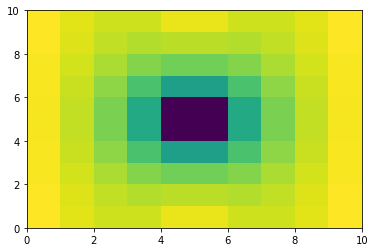

In [7]:
polaron_size_object = mass_size.polaron_size(params=params)

ferro_order_sigma = polaron_size_object.calc_polaron_size(ferro_order, '1')
plt.pcolormesh(ferro_order_sigma)

Create excitations according to variable "excitation_no"

Iter = 0 , Overlap = (0.999999994295972+2.14417832020925e-17j)
Iter = 1 , Overlap = (0.9999999944601883+1.766473338014086e-16j)
Iter = 2 , Overlap = (0.9999999946156074+2.2595171549891433e-17j)
Iter = 3 , Overlap = (0.999999994766625+3.9019484019398105e-17j)
Iter = 4 , Overlap = (0.9999999949123042+3.946602641644657e-17j)
Iter = 5 , Overlap = (0.9999999950536469+3.627344885531581e-18j)
Iter = 6 , Overlap = (0.9999999951904143+2.155901853533872e-17j)
Iter = 7 , Overlap = (0.9999999953231113-4.182469736560776e-18j)
Iter = 8 , Overlap = (0.9999999954517195+1.0213970996126862e-17j)
Iter = 9 , Overlap = (0.9999999955765406-5.007699514991857e-18j)
Iter = 10 , Overlap = (0.9999999956976043+4.287040862005521e-18j)
Iter = 11 , Overlap = (0.9999999958151767-4.2183862510774785e-18j)
Iter = 12 , Overlap = (0.9999999959292873+1.3317939821777428e-18j)
Iter = 13 , Overlap = (0.9999999960401363-3.2738008182380255e-18j)
Iter = 14 , Overlap = (0.9999999961477883-9.616693367636479e-20j)
Iter = 15 , Overl

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


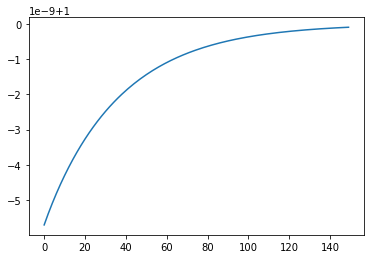

In [8]:
coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)

run_number = 150

new_ferro_gs = ferro_order.copy()
overlap_arr = np.zeros(run_number, dtype=complex)
gs_energ_arr = np.zeros(run_number, dtype=complex)
for t in range(run_number):
    new_ferro_gs_next = new_ferro_gs.copy()
    energy_exc_states, psi_exc_states = diag_object.diag_h_eff(new_ferro_gs_next)

    #new_ferro_gs = np.zeros((My,Mx,n), dtype=complex)

    for i in range(My):
        for j in range(Mx):
            new_ferro_gs[i,j] = set_phase(psi_exc_states[i,j,0], n)
            #new_ferro_gs[i,j] = set_phase(new_ferro_gs[i,j], n) #np.sign(np.sum((1/(n)**0.5)*new_ferro_gs[i,j]))*new_ferro_gs[i,j]

    gs_energ_arr[t] = coupl_object.calc_hamiltonian_matrix_element(new_ferro_gs, np.array([0,0]), new_ferro_gs, np.array([0,0]))[0] #energy_exc_states[0,0,0]
    overlap_arr[t] = coupl_object.calc_overlap(new_ferro_gs, new_ferro_gs_next)
    print('Iter =', t, ', Overlap =', overlap_arr[t])

plt.plot(overlap_arr)

(9.755296570546079e-11+2.0503241429883168e-19j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


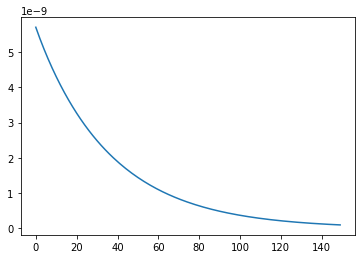

In [9]:
print(np.min(1-overlap_arr))
plt.plot(1-overlap_arr)

[-307.96583478+6.50584508e-19j -307.96584129-7.47415338e-19j
 -307.96584762+8.48704540e-19j -307.96585377+5.50758407e-19j
 -307.96585975-2.19893995e-19j -307.96586556-1.04420357e-19j
 -307.96587122+1.22763582e-19j -307.96587672+1.23345919e-18j
 -307.96588206+5.52285638e-19j -307.96588727+1.56163284e-18j
 -307.96589232+1.30622844e-18j -307.96589724-9.61687886e-20j
 -307.96590203+1.12487218e-19j -307.96590669-3.32286761e-19j
 -307.96591122-1.06538213e-18j -307.96591562-2.38404857e-19j
 -307.96591991+4.31783459e-19j -307.96592408+1.32777284e-18j
 -307.96592814+4.73861352e-19j -307.96593209+4.78607379e-20j
 -307.96593593+4.74952546e-20j -307.96593967+4.86606503e-19j
 -307.96594331+5.00773589e-19j -307.96594685+5.03123722e-19j
 -307.96595029-4.36128322e-19j -307.96595364+4.55425865e-19j
 -307.9659569 -1.27309481e-18j -307.96596008-2.03615591e-19j
 -307.96596316+6.05912361e-19j -307.96596617+2.44803324e-19j
 -307.96596909-3.82722986e-19j -307.96597194-7.49627743e-19j
 -307.96597471-9.3522971

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


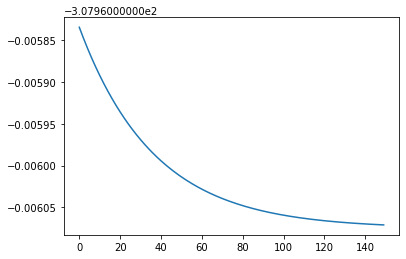

In [10]:
print(gs_energ_arr)
plt.plot(gs_energ_arr)

In [11]:
full_exc_sample_wf = ferro_order.copy()
full_exc_sample_wf[0,0] = psi_exc_states[0,0,1]

overlap = coupl_object.calc_overlap(full_exc_sample_wf, ferro_order)
print('Overlap =', overlap)

Overlap = (0.00048818615909838756-3.393507654371422e-16j)


### Visualize the Excitation Energies and Wavefunctions

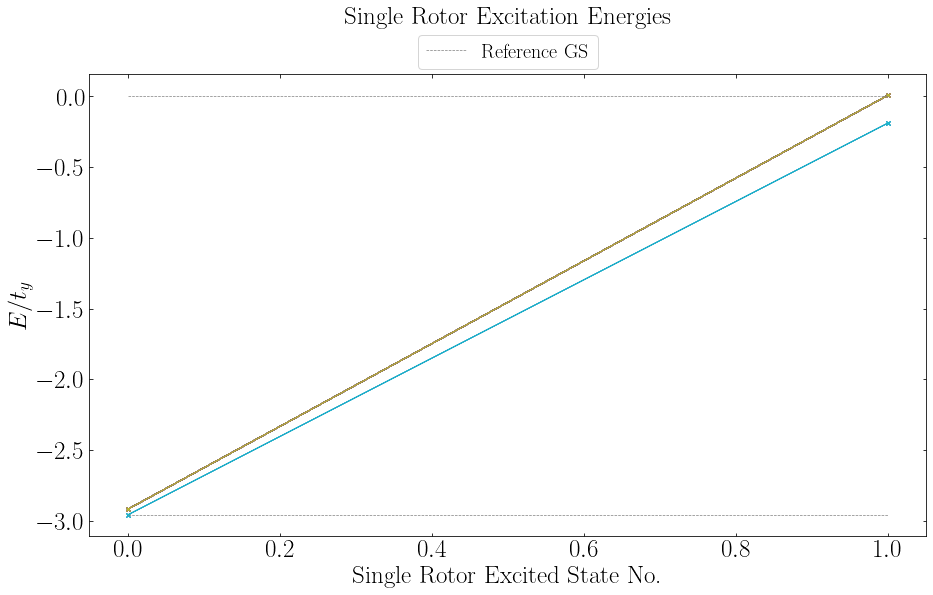

In [12]:
plot_energies(My, Mx, scale, energy_exc_states, energy_exc_states[0,0,0], 'Single Rotor Excitation Energies', '1_excitation_energies')

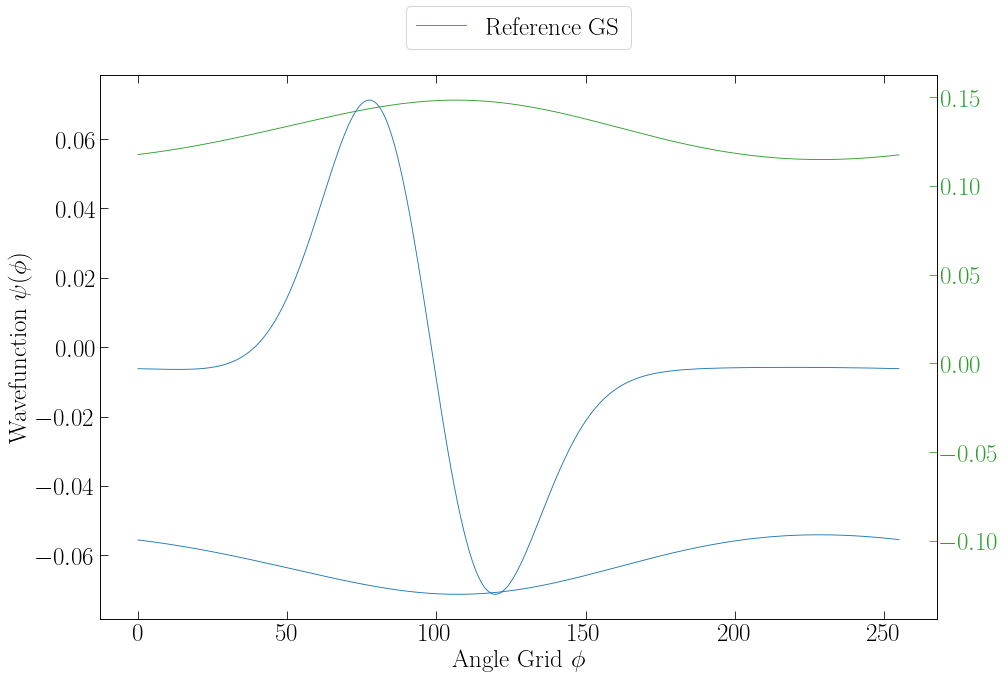

In [13]:
'''
choose the rotor index from which to display the excitation wavefunctions
'''
index_i = 0
index_j = 0

plot_comp_wf(psi_exc_states[index_i,index_j], ferro_order[index_i,index_j], exc_number, '2_wavefunctions')

### Create the new reference configuration from the diagonalization to ensure orthogonality!

In [14]:
#new_ferro_gs = np.zeros((My,Mx,n), dtype=complex)

#for i in range(My):
#    for j in range(Mx):
#        new_ferro_gs[i,j] = psi_exc_states[i,j,0]
#        new_ferro_gs[i,j] = set_phase(new_ferro_gs[i,j], n) #np.sign(np.sum((1/(n)**0.5)*new_ferro_gs[i,j]))*new_ferro_gs[i,j]

#new_ferro_order_sigma = polaron_size_object.calc_polaron_size(new_ferro_gs, '1')
#plt.pcolormesh(new_ferro_order_sigma)

Demonstrate that 1st excited states are orthogonal to the new ground state reference

In [15]:
index_i1 = 3
index_j1 = 4

index_i1_1 = 7
index_j1_1 = 2

index_i2 = 4
index_j2 = 4

index_i2_2 = 7
index_j2_2 = 2

n_excited_state = 1

full_exc_sample_wf = new_ferro_gs.copy()
full_exc_sample_wf[index_i1,index_j1] = set_phase(psi_exc_states[index_i1,index_j1,n_excited_state], n)
full_exc_sample_wf[index_i1_1,index_j1_1] = set_phase(psi_exc_states[index_i1_1,index_j1_1,n_excited_state], n)

full_exc_sample_wf2 = new_ferro_gs.copy()
full_exc_sample_wf2[index_i2,index_j2] = set_phase(psi_exc_states[index_i2,index_j2,n_excited_state], n)
full_exc_sample_wf2[index_i2_2,index_j2_2] = set_phase(psi_exc_states[index_i2_2,index_j2_2,n_excited_state], n)

overlap = coupl_object.calc_overlap(new_ferro_gs, full_exc_sample_wf)
E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(new_ferro_gs, np.array([0,0]), full_exc_sample_wf, np.array([0,0]))
print("Overlap Excitation with RF configuration =", overlap)
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(full_exc_sample_wf, np.array([0,0]), full_exc_sample_wf2, np.array([0,0]))
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")
overlap = coupl_object.calc_overlap(full_exc_sample_wf, full_exc_sample_wf2)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

overlap = coupl_object.calc_overlap(new_ferro_gs, ferro_order)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

Overlap Excitation with RF configuration = (2.3020881366503716e-33+4.480669355909416e-40j)
Coupling term <psi_RF|H|psi_EX>:  (0.00015817257161450805-2.401180056984339e-14j) 

Coupling term <psi_RF|H|psi_EX>:  (4.205248105073604e-05-2.528281981439251e-14j) 

Overlap new ferro RF and old ferro order RF configuration = (2.7026966114106048e-33-5.438790102566477e-40j)
Overlap new ferro RF and old ferro order RF configuration = (0.99997667559947+3.351586073206944e-16j)


Demonstrate the location of the excitation

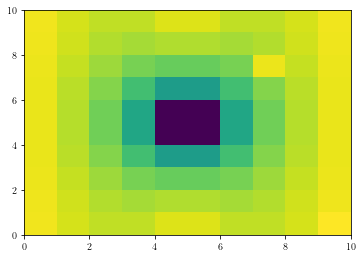

In [16]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(full_exc_sample_wf2, '1')
plt.pcolormesh(new_ferro_order_sigma[::-1,::])

#plt.plot(full_exc_sample_wf[0,0])

### Create the wavefunction list containing all single-rotor excitations

In [17]:
psi_arr = []

psi_arr.append(new_ferro_gs)

for m in range(1,exc_number):
    print("m", m)
    for i in range(My):
        for j in range(Mx):
            psi = new_ferro_gs.copy()
            psi[i,j] = set_phase(psi_exc_states[i,j,m], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)
inter_combinations = len(index_list_rotor_1)

for m1 in range(1,exc_number):
    for m2 in range(1,exc_number):
        for i in range(inter_combinations):
            index_rotor_1 = index_list_rotor_1[i]
            index_rotor_2 = index_list_rotor_2[i]

            psi = new_ferro_gs.copy()
            psi[index_rotor_1[0],index_rotor_1[1]] = set_phase(psi_exc_states[index_rotor_1[0],index_rotor_1[1],m1], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]
            psi[index_rotor_2[0],index_rotor_2[1]] = set_phase(psi_exc_states[index_rotor_2[0],index_rotor_2[1],m2], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

print("No. of states =", n_states)

h_eff, s_ove = coupl_object.calc_hamiltonian(n_states, psi_arr, q_arr)
print("Finished calculation of Hamiltonian!")

m 1
No. of states = 5051


KeyError: 'n_states'

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


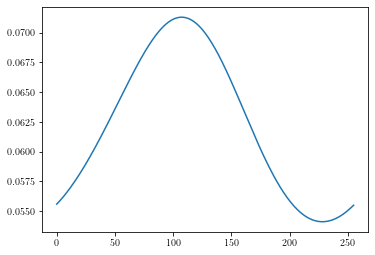

In [ ]:
plt.plot(psi_arr[0][0,0])

-1.2789769243681803e-13
1.2789769243681803e-13
-7.130764943871966e-16
7.082272611231832e-16


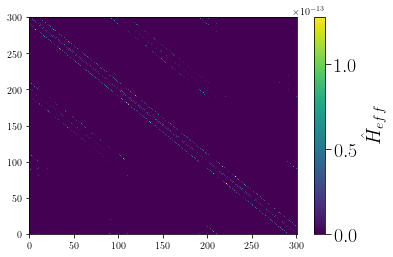

In [ ]:
%matplotlib inline
check = np.conjugate(h_eff.T)-h_eff

print(np.min(check.real))
print(np.max(check.real))

print(np.min(check.imag))
print(np.max(check.imag))

fig = plt.figure()
pc = plt.pcolormesh(np.abs(check)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

In [ ]:
e_vals, e_kets, s_e_vec = coupl_object.diag_hamiltonian(h_eff, s_ove)

(301, 301)
5.636519353268774e-08
(array([0]),)
[[-0.99999988+5.80587997e-11j]]


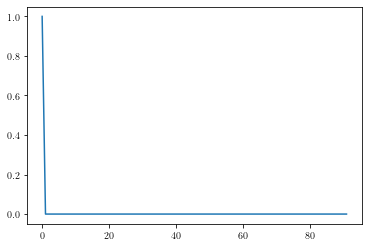

In [ ]:
print(e_kets.shape)
print(np.sum(np.abs(e_kets[0,1])**2))
plt.plot(np.arange(92), np.abs(e_kets[0:92,0])**2)
print(np.where(np.abs(e_kets[:, 0])**2 > 1e-6))
print(e_kets[np.where(np.abs(e_kets[:, 0])**2 > 1e-6), 0])

Max e-vals = 274.5057800509657
Min e-vals = -307.9659728330046


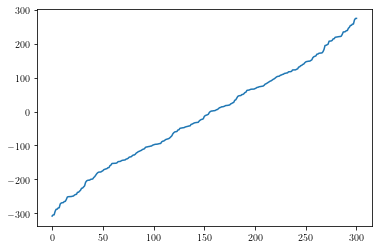

In [ ]:
plt.plot(e_vals)
print("Max e-vals =", np.max(e_vals))
print("Min e-vals =", np.min(e_vals))

(array([ 3.,  3.,  2.,  6.,  6.,  5.,  4.,  4.,  2.,  8.,  3.,  9.,  4.,
        10.,  9.,  6.,  7.,  9., 11.,  6.,  3.,  6., 11.,  8.,  5.,  5.,
         9., 10.,  6.,  3.,  7.,  6., 13.,  6.,  6.,  8., 12.,  4.,  6.,
         6.,  6.,  5.,  1.,  4.,  6.,  8.,  5.,  2.,  4.,  3.]),
 array([-307.96597283, -296.31653778, -284.66710272, -273.01766766,
        -261.3682326 , -249.71879754, -238.06936249, -226.41992743,
        -214.77049237, -203.12105731, -191.47162226, -179.8221872 ,
        -168.17275214, -156.52331708, -144.87388203, -133.22444697,
        -121.57501191, -109.92557685,  -98.27614179,  -86.62670674,
         -74.97727168,  -63.32783662,  -51.67840156,  -40.02896651,
         -28.37953145,  -16.73009639,   -5.08066133,    6.56877372,
          18.21820878,   29.86764384,   41.5170789 ,   53.16651396,
          64.81594901,   76.46538407,   88.11481913,   99.76425419,
         111.41368924,  123.0631243 ,  134.71255936,  146.36199442,
         158.01142947,  169.66086453

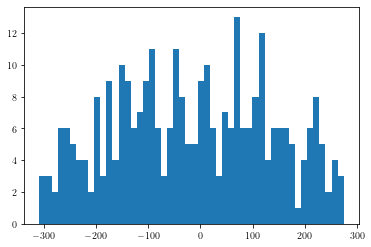

In [ ]:
plt.hist(e_vals, bins=50)
#plt.xlim(-0.5e25,0.5e25)

0.04993726380265718
(-0.002331400992079055+5.668912157137587e-15j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


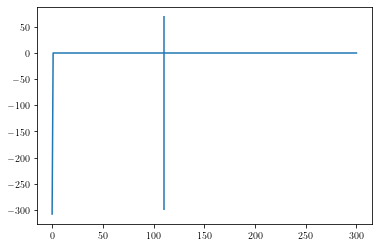

In [ ]:
%matplotlib inline
plt.plot(h_eff[0])
print(np.max(np.abs(h_eff)[0][1:201]))
print(h_eff[0,111])
plt.vlines(x=110, ymin=-300, ymax=70)

In [ ]:
%matplotlib qt
fig = plt.figure()
pc = plt.pcolormesh(np.abs(h_eff)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


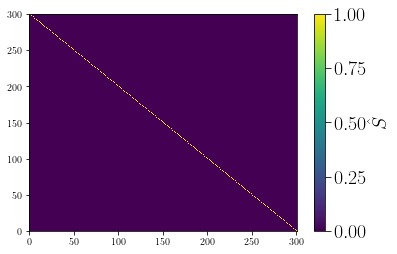

In [ ]:
%matplotlib inline
fig = plt.figure()
pc = plt.pcolormesh(np.abs(s_ove)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{S}$', size=20)

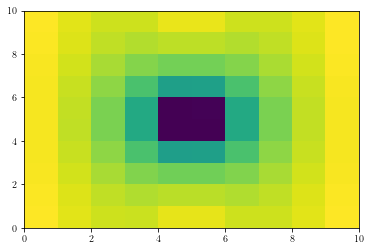

In [ ]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(psi_arr[105], '1')
plt.pcolormesh(new_ferro_order_sigma)

In [ ]:
np.sum(psi_arr[160]-psi_arr[105])

(0.012063721103999114-2.0679515313825692e-25j)

In [ ]:
import scipy
scipy.linalg.eig(np.ones((10,10)))

(array([ 0.+0.j, 10.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j]),
 array([[-9.48683298e-01,  3.16227766e-01, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18],
        [ 1.05409255e-01,  3.16227766e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01],
        [ 1.05409255e-01,  3.16227766e-01,  9.16666667e-01,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
          9.16666667e-01, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
    

In [ ]:
index_list = [np.array([0,0])]

My = 4
Mx = 4 
iter = 0
for i in range(My):
    for j in range(Mx):
        for k in range(My):
            for p in range(Mx):
                index_arr = np.array([k,p])
                #if np.any(np.isin(index_arr, np.array([i,j]))) or np.any(np.isin(index_arr, np.array([j,i]))): # and (np.any(np.isin(index_list, index_arr)) or np.any(np.isin(index_list, index_arr[::1]))):
                if np.any(np.isin(index_arr, np.array([j,i]))) != False and k != p:
                    iter += 1  
                    index_list.append(index_arr)          

M = int(My*Mx)
print(M)
print(M*(M-1)/2)
print(iter)
#print(index_list)
print(len(index_list))

16
120.0
144
145


In [ ]:
index_list = []
index_mat = np.zeros((My,Mx,My,Mx,2), dtype=int)
iter_i_before = 1

for i in range(My):
    iter_j_before = 1
    for j in range(Mx):
        if iter_i_before > i and iter_j_before > j:
            index_arr = np.array([i,j])

            index_mat[i,j,k,p] = index_arr
            index_list.append(index_arr)
    
        iter_j_before += 1
        #for k in range(My):
        #    for p in range(Mx):
    iter_i_before += 1            

print(len(index_list))
print(index_list)
print(index_mat[0,0])
print(index_mat.shape)

16
[array([0, 0]), array([0, 1]), array([0, 2]), array([0, 3]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3])]
[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]
(4, 4, 4, 4, 2)


In [ ]:
index_list = [np.array([1,1])]
index_list = index_list.append(np.array([1,2]))
print(index_list)

np.isin(index_list, np.array([0,0]))

None


array(False)

In [ ]:
import numpy as np

In [ ]:
index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)

M = My*Mx
print(M*(M-1)/2)
print(len(index_list_rotor_1))
print(len(index_list_rotor_2))

4950.0
4950
4950


In [ ]:
print(len(index_list))
print(index_list)

4950
[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]), array([1, 9]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]), array([2, 7]), array([2, 8]), array([2, 9]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]), array([3, 9]), array([4, 0]), array([4, 1]), array([4, 2]), array([4, 3]), array([4, 4]), array([4, 5]), array([4, 6]), array([4, 7]), array([4, 8]), array([4, 9]), array([5, 0]), array([5, 1]), array([5, 2]), array([5, 3]), array([5, 4]), array([5, 5]), array([5, 6]), array([5, 7]), array([5, 8]), array([5, 9]), array([6, 0]), array([6, 1]), array([6, 2]), array([6, 3]), array([6, 4]), array([6, 5]), array([6, 6]), arra

In [ ]:
(0,0)->(0,1),(0,0)->(1,0),(0,0)->(1,1)
(0,1)->(1,0),(0,1)->(1,1)
(1,0)->(1,1)

SyntaxError: invalid syntax (2176338191.py, line 1)

In [ ]:
iter = 0

for i in range(1,3):
    for j in range(1,3):
        iter += 1

print(iter)

4
